In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv('results.csv')
dfmp = pd.read_csv('maxprop.csv')
df = df.append(dfmp)
display(df)


,aborted,buffer_size,buffertime_avg,buffertime_med,created,d_dist_avg,delivered,delivery_prob,distance_avg,dropped,...,response_prob,router,scenario,seed,sim_time,speed_avg,started,task_id,ttl,worker
0,136,200,7900.0794,7340,1471,7459.679908,722,0.4908,7610.871977,7445,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,78802,21600,2.209684,14599,20.0,300,asterion
1,154,200,8153.3537,7658,1471,7382.226876,682,0.4636,7418.099846,7700,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,94176,21600,2.229145,14924,20.0,300,asterion
2,174,200,8124.0050,7677,1471,7632.846426,726,0.4935,7646.884590,7638,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,65221,21600,2.285095,15569,20.0,300,asterion
3,155,200,8468.8995,8460,1471,7310.640844,693,0.4711,7657.412928,7843,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,44180,21600,2.329944,15047,20.0,300,asterion
4,144,200,8054.3248,7660,1471,7242.395922,723,0.4915,7474.980721,7738,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,79009,21600,2.206903,15242,20.0,300,asterion
5,150,200,8301.2233,8080,1471,7183.035409,699,0.4752,7385.165650,7952,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,68831,21600,2.329720,15413,20.0,300,asterion
6,150,200,8479.3274,8055,1471,7184.545988,687,0.4670,7329.208739,8172,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,73906,21600,2.370111,15567,20.0,300,asterion
7,175,200,8150.8005,7823,1471,7465.346186,710,0.4827,7466.575378,7873,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,15598,21600,2.102627,15400,20.0,300,asterion
8,166,200,8048.7389,7650,1471,7473.048342,691,0.4697,7504.159046,7472,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,78051,21600,2.345595,14568,20.0,300,asterion
9,175,200,8133.5580,7610,1471,7150.950704,714,0.4854,7606.290240,8113,...,0,Epidemic,cdmx_EpidemicRouter_100n_[300]ttl_[21600]s_see...,71182,21600,2.455820,15276,20.0,300,asterion


In [2]:
#Filter results for a specific value e.g.

#Fix the buffer size to 50MB
df = df[df.buffer_size == 50] 
#Discard results for 800 and 1000
df = df[df.nodes <= 600]

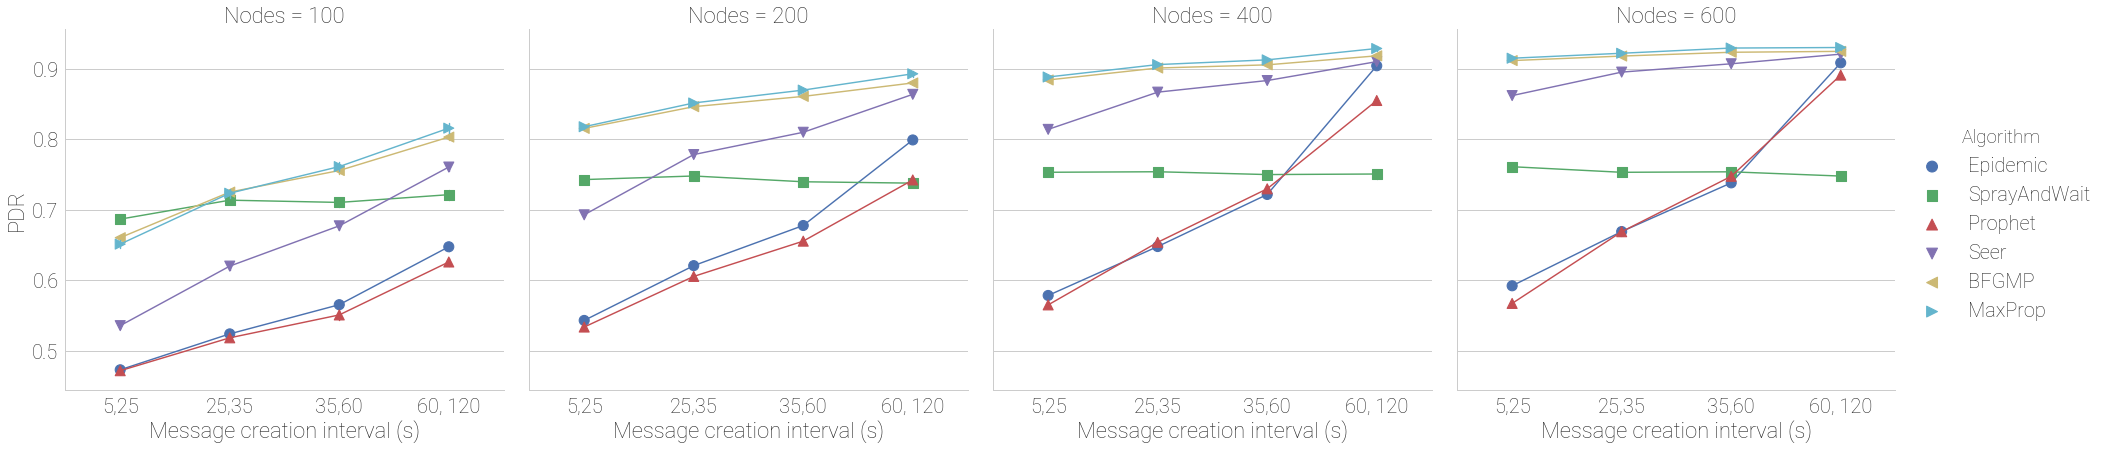

In [3]:
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_pdr.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_pdr.svg')
    pdf.savefig()

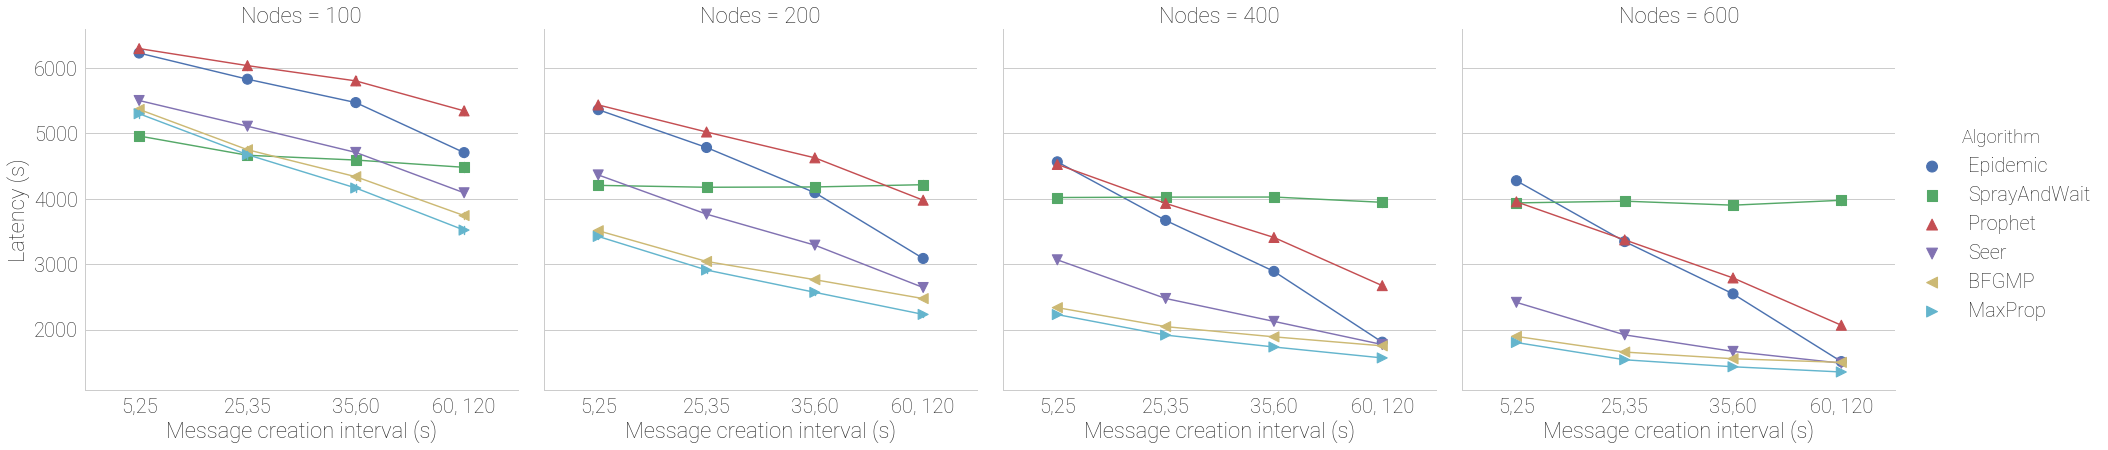

In [4]:
#Same as the above cell, for Latency
with PdfPages('VANET_latency.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_latency.svg')
    pdf.savefig()

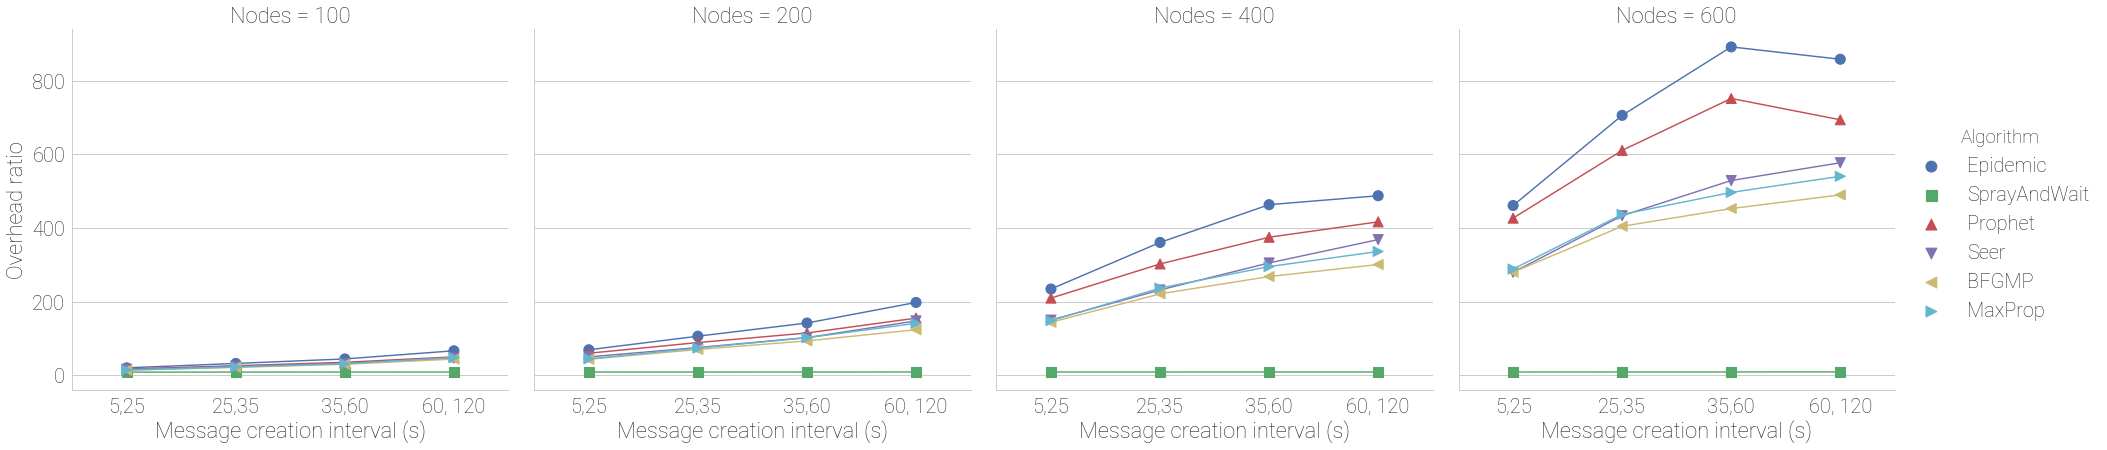

In [5]:
#Same as the above cell, for Latency
with PdfPages('VANET_overhead.pdf') as pdf:
    g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', data=df, col='nodes', order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Message creation interval (s)', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Nodes = {col_name}')
    for i in range(4):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_overhead.svg')
    pdf.savefig()

In [6]:
# Find the incomplete values for certain columns and show the name of the simulation file
pd.set_option('display.max_colwidth', -1)
ids = df[df.speed_avg.isnull()]
# display(ids)
ids.task_id.unique()

array([  0.,  25.,   1.,  26.,   2.,   3.,  76., 127., 151., 153., 203.,
       250., 275., 326., 350., 353., 477., 478.])

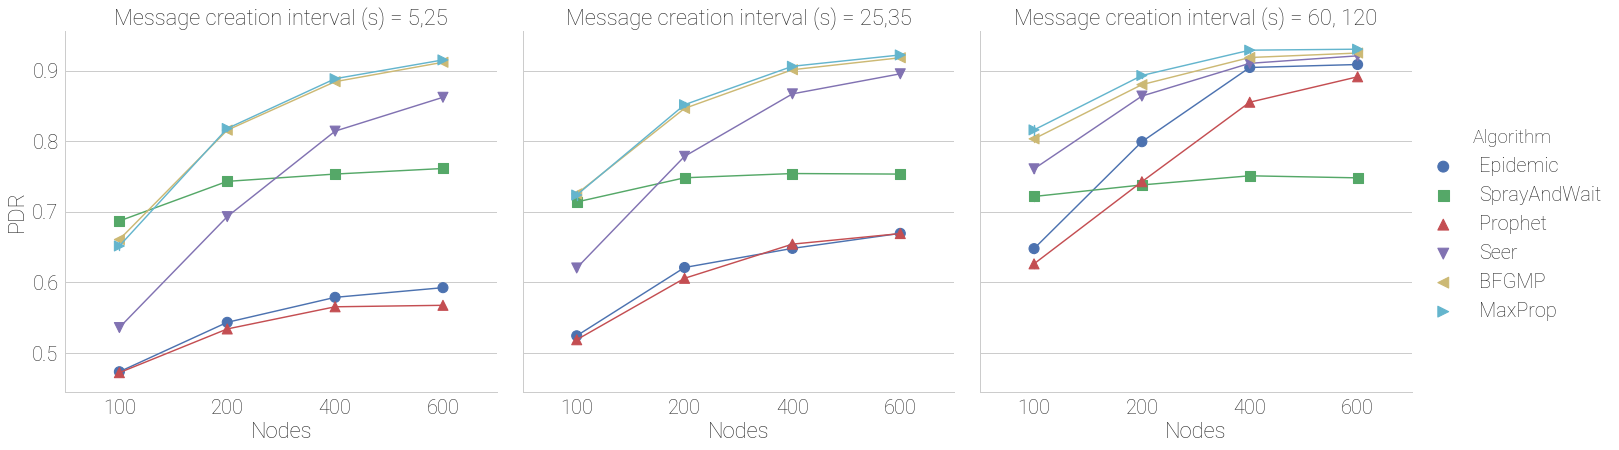

In [7]:
# Alternate plots
# Plot the delivery probability ratio
markers = ['o','s', '^', 'v', '<', '>']
x_axis_order = ['5,25', '25,35', '60, 120']

sns.set(style='whitegrid', font='Roboto', font_scale=2, rc={"lines.linewidth": 0.8, "legend.markerscale":3})
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_pdr.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='delivery_prob', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'PDR')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_pdr.svg')
    pdf.savefig()

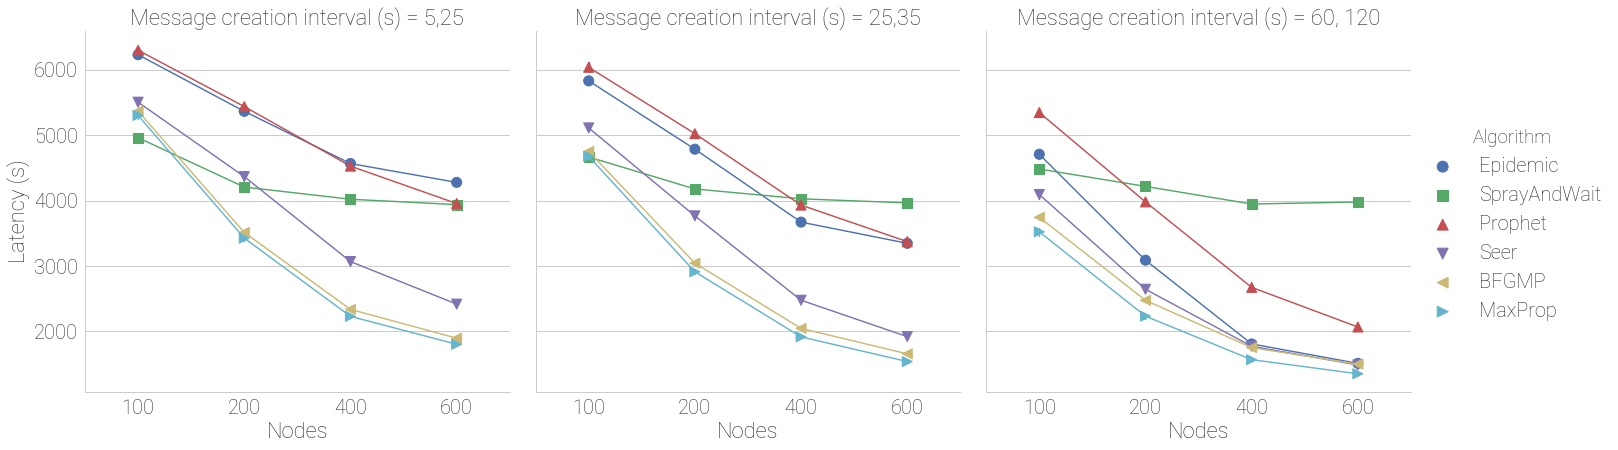

In [8]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_latency.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='latency_avg', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Latency (s)')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_latency.svg')
    pdf.savefig()

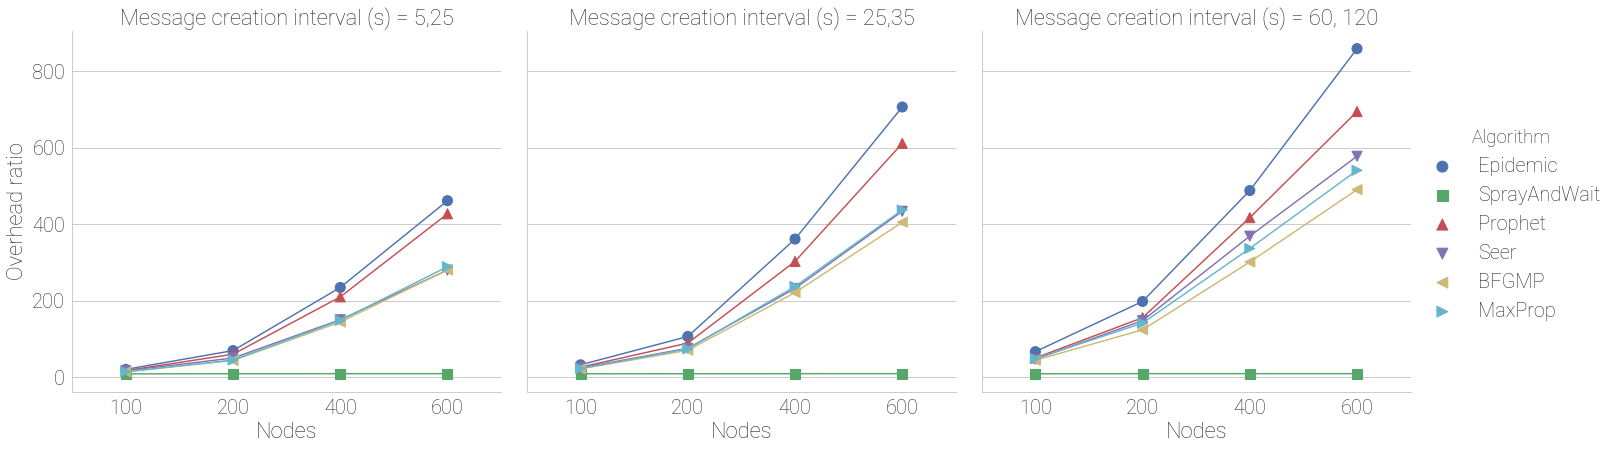

In [9]:
#Saves the Packet delivery ratio plot to svg/pdf
with PdfPages('VANET_alt_overhead.pdf') as pdf:
    g = sns.factorplot(x='nodes', y='overhead_ratio', hue='router', data=df, col='message_interval', col_order=x_axis_order, markers=markers, size=6.75)
    g.set_axis_labels('Nodes', 'Overhead ratio')
    g._legend.set_title('Algorithm')
    g.set_titles('Message creation interval (s) = {col_name}')
    for i in range(3):
        plt.setp(g.axes[0][i].collections, sizes=[100])
    g.savefig('VANET_alt_overhead.svg')
    pdf.savefig()